In [5]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy.integrate as spi
from scipy.integrate import simpson, romberg, trapezoid

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Ross Anthony Miranda D'Angelo
*Métodos computacionales 2024-II*

---

#1
* Implemente una función para el **método de integración de Romberg** definiendo un límite de tolerancia de 1e-8 y/o un máximo de iteraciones de 10.

* Encuentre la integral para

$$\int_0^{\pi/4} dx\, e^{3x}\cdot \sin(x)$$

* Imprima su resultado y compare los valores dados por `scipy.integrate.romberg`

* Finalmente, encuentre el valor del error, hallando el valor exacto usando `sympy`



In [7]:
# Función a integrar: f(x) = e^(3x) * sin(x)
def f(x):
    return np.exp(3*x) * np.sin(x)

#método de Romberg
def romberg_integration(f, a, b, tol=1e-8, max_iter=10):
    R = np.zeros((max_iter, max_iter))  # Matriz de Romberg

    # Primera aprox: Regla del trapecio con 1 subintervalo
    R[0, 0] = (b - a) * (f(a) + f(b)) / 2

    for k in range(1, max_iter):
        n = 2**k  # Número de subintervalos
        h = (b - a) / n  # Tamaño del subintervalo

        sumatoria = sum(f(a + (2*i - 1) * h) for i in range(1, n//2 + 1))
        R[k, 0] = 0.5 * R[k-1, 0] + h * sumatoria

        # extrapolacion Richardson
        for j in range(1, k + 1):
            R[k, j] = (4**j * R[k, j-1] - R[k-1, j-1]) / (4**j - 1)

        #convergencia
        if k > 1 and abs(R[k, k] - R[k-1, k-1]) < tol:
            return R[k, k]  # Retorna el valor convergente

    return R[max_iter-1, max_iter-1]  #último valor si es que no converge antes

a, b = 0, np.pi/4  # Intervalo de integración

#Romberg
resultado_romberg_manual = romberg_integration(f, a, b)

# scipy.integrate.romberg
resultado_scipy = spi.romberg(f, a, b, tol=1e-8, divmax=10)

#valor exacto con sympy
x = sp.symbols('x')
f_sym = sp.exp(3*x) * sp.sin(x)
valor_exacto = sp.integrate(f_sym, (x, a, b)).evalf()

#error absoluto
error_manual = abs(resultado_romberg_manual - valor_exacto)
error_scipy = abs(resultado_scipy - valor_exacto)

print(f"Integral usando Romberg manual: {resultado_romberg_manual:.10f}")
print(f"Integral usando scipy.integrate.romberg: {resultado_scipy:.10f}")
print(f"Valor exacto usando sympy: {valor_exacto:.10f}")
print(f"Error del método manual: {error_manual:.10e}")
print(f"Error del método scipy: {error_scipy:.10e}")


Integral usando Romberg manual: 1.5920977079
Integral usando scipy.integrate.romberg: 1.5920977079
Valor exacto usando sympy: 1.5920977079
Error del método manual: 6.5725203058e-14
Error del método scipy: 6.6169292268e-14


<ipython-input-7-fee31b465f81>:35: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  resultado_scipy = spi.romberg(f, a, b, tol=1e-8, divmax=10)


#2

* Usando los *métodos trapezoidal compuesto*, *simpson 1/3* y de *medio punto* encuentre la siguiente integral,

$$\int_e^{1+e} dx\, \frac{1}{x\ln x}$$

* Luego, haga un estudio de la convergencia en términos del valor de $h$ o de los sub-intervalos de la función. ¿Cuál es mejor?


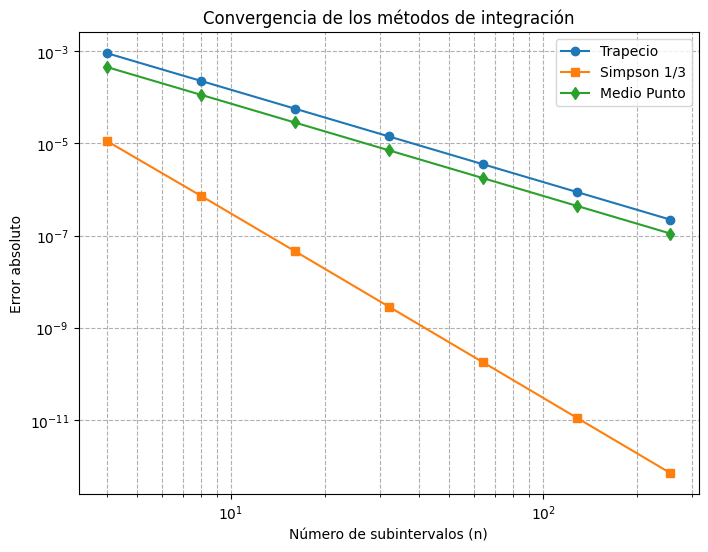

In [9]:
def f(x):
    return 1 / (x * np.log(x))

# Límites
a, b = np.e, 1 + np.e

def trapecio_compuesto(f, a, b, n):
    x = np.linspace(a, b, n+1)
    h = (b - a) / n
    return (h/2) * (f(x[0]) + 2 * np.sum(f(x[1:-1])) + f(x[-1]))

def simpson_13(f, a, b, n):
    if n % 2 == 1:  # n debe ser par para Simpson
        n += 1
    x = np.linspace(a, b, n+1)
    h = (b - a) / n
    return (h/3) * (f(x[0]) + 4*np.sum(f(x[1:-1:2])) + 2*np.sum(f(x[2:-1:2])) + f(x[-1]))

def medio_punto(f, a, b, n):
    h = (b - a) / n
    x_m = np.linspace(a + h/2, b - h/2, n)  # Puntos medios
    return h * np.sum(f(x_m))

#vlor exacto con sympy
x_sym = sp.Symbol('x')
integral_exacta = sp.integrate(1 / (x_sym * sp.ln(x_sym)), (x_sym, a, b))
valor_exacto = float(integral_exacta.evalf())

# Evaluar los métodos con distintos valores de n
n_values = [4, 8, 16, 32, 64, 128, 256]
errores_trapecio = []
errores_simpson = []
errores_medio_punto = []

for n in n_values:
    I_trap = trapecio_compuesto(f, a, b, n)
    I_simp = simpson_13(f, a, b, n)
    I_med = medio_punto(f, a, b, n)

    errores_trapecio.append(abs(I_trap - valor_exacto))
    errores_simpson.append(abs(I_simp - valor_exacto))
    errores_medio_punto.append(abs(I_med - valor_exacto))

# Grafica convergencia
plt.figure(figsize=(8,6))
plt.loglog(n_values, errores_trapecio, 'o-', label="Trapecio")
plt.loglog(n_values, errores_simpson, 's-', label="Simpson 1/3")
plt.loglog(n_values, errores_medio_punto, 'd-', label="Medio Punto")
plt.xlabel("Número de subintervalos (n)")
plt.ylabel("Error absoluto")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.title("Convergencia de los métodos de integración")
plt.show()


RESPUESTA: El método de **Simpson 1/3** es el mejor en términos de convergencia, ya que su  error disminuye mucho más rápido en comparación con los otros. Esto significa que con menos subintervalos, Simpson alcanza una mayor precisión, mientras que los otros dos requieren más divisiones para lograr el mismo nivel de exactitu

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [14]:

from scipy.special import roots_legendre

def gauss_quad(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana de Legendre.

    Parameters:
    - func: La función a integrar.
    - a, b: Límites del intervalo de integración.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Cambio de variable para el intervalo [a, b]
    t = 0.5 * (b - a) * x + 0.5 * (b + a)

    # Evaluar la suma ponderada
    integral = 0.5 * (b - a) * np.sum(w * func(t))
    return integral

# Punto 2: f(x) = 1 / (x * ln(x))
def f(x):
    return 1 / (x * np.log(x))

# límites de integración
a, b = np.e, 1 + np.e

# Número de puntos para la cuadratura
n = 100  #tiene que ajustarse a discrecion

# Calcular la integral usando cuadratura gaussiana
resultado = gauss_quad(f, a, b, n)

print(f"DEL PUNTO 2: La aprox de la integral usando cuadratura gaussiana es: {resultado}")


DEL PUNTO 2: La aprox de la integral usando cuadratura gaussiana es: 0.27251388050258346


#4

Encuentra todas las raices para los polinomios de grado 3 y 4 de **Legendre** usando el Método de la Secante y Newton-Raphson.



```python
import sympy as sp
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn = sp.legendre(n, x)

```

y calcule los pesos $w_i$ de la cuadratura mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.


In [19]:
x = sp.Symbol('x')

#calcular raíces con Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-10, max_iter=100):
    xn = x0
    for _ in range(max_iter):
        fxn = f(xn)
        dfxn = df(xn)
        if abs(fxn) < tol:
            return xn
        if dfxn == 0:
            raise ValueError("Derivada cero. Newton-Raphson falló.")
        xn = xn - fxn / dfxn
    return None

# calcular raíces usando el método de la secante
def secante(f, x0, x1, tol=1e-10, max_iter=100):
    for _ in range(max_iter):
        fx0, fx1 = f(x0), f(x1)
        if abs(fx1) < tol:
            return x1
        if fx1 - fx0 == 0:
            raise ValueError("División por cero en el método de la secante.")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x2
    return None

# Raíces y pesos  cuadratura gaussiana
def calcular_raices_pesos(n):
    Pn = sp.legendre(n, x)  # Polinomio de Legendre de grado n
    dPn = sp.diff(Pn, x)    # Derivada del polinomio

    # Convertir a funciones numéricas
    Pn_func = sp.lambdify(x, Pn, 'numpy')
    dPn_func = sp.lambdify(x, dPn, 'numpy')

    # Estimaciones iniciales de raíces
    estimaciones = np.cos(np.pi * (np.arange(1, n+1) - 0.25) / (n + 0.5))

    # Encontrar raíces con Newton-Raphson
    raices = np.array([newton_raphson(Pn_func, dPn_func, xi) for xi in estimaciones])

    # Calcular los pesos de la cuadratura
    pesos = 2 / ((1 - raices**2) * (dPn_func(raices)**2))

    return raices, pesos

# Cálculo para n = 3 y n = 4, y n = 5 solo por probar
for n in [3, 4, 5]:
    raices, pesos = calcular_raices_pesos(n)
    print(f"\nPolinomio de Legendre de grado {n}:")
    print(f"Raíces: {raices}")
    print(f"Pesos: {pesos}")



Polinomio de Legendre de grado 3:
Raíces: [ 7.74596669e-01  6.12323400e-17 -7.74596669e-01]
Pesos: [0.55555556 0.88888889 0.55555556]

Polinomio de Legendre de grado 4:
Raíces: [ 0.86113631  0.33998104 -0.33998104 -0.86113631]
Pesos: [0.34785485 0.65214515 0.65214515 0.34785485]

Polinomio de Legendre de grado 5:
Raíces: [ 9.06179846e-01  5.38469310e-01  2.83276945e-16 -5.38469310e-01
 -9.06179846e-01]
Pesos: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
